In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
cd /content/drive/My Drive/Backup/EVP/S7

/content/drive/My Drive/Backup/EVP/S7


In [0]:
from __future__ import print_function
import torch
from torch.optim.lr_scheduler import OneCycleLR



# Setting Seed for Reproducibility

In [22]:
SEED = 2

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

CUDA Available? True


# Data Loader


In [0]:
import torchvision
from torchvision import datasets, transforms

In [24]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataloader_args = dict(batch_size=64, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)


trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)


train_loader = torch.utils.data.DataLoader(trainset,shuffle=True, **dataloader_args)
test_loader = torch.utils.data.DataLoader(testset, shuffle=False,  **dataloader_args)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## Visualise Data

horse   cat   car horse


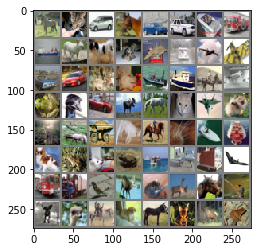

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Model Summary


In [0]:
from vision.models.cifar_model_custom import Cifar

try:
  from torchsummary import summary
except:
  !pip install torchsummary
  from torchsummary import summary

In [27]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Cifar().to(device)
summary(model, input_size=(3,32,32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 3, 32, 32]              27
            Conv2d-2           [-1, 16, 32, 32]              48
       BatchNorm2d-3           [-1, 16, 32, 32]              32
              ReLU-4           [-1, 16, 32, 32]               0
           Dropout-5           [-1, 16, 32, 32]               0
            Conv2d-6           [-1, 16, 32, 32]             144
            Conv2d-7           [-1, 16, 32, 32]             256
       BatchNorm2d-8           [-1, 16, 32, 32]              32
              ReLU-9           [-1, 16, 32, 32]               0
          Dropout-10           [-1, 16, 32, 32]               0
        MaxPool2d-11           [-1, 16, 16, 16]               0
           Conv2d-12           [-1, 16, 16, 16]             144
           Conv2d-13           [-1, 32, 16, 16]             512
      BatchNorm2d-14           [-1

# Train and Evaluate Model

In [0]:
from vision.train.train_evaluate import Train
import torch.nn as nn
import torch.optim as optim

## Initialising and setting hyper-parameters


In [0]:
EPOCHS = 50
learning_rate = 0.001
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Cifar().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(train_loader), epochs=EPOCHS)

## Creating Config for Training 

In [0]:
config_list ={
    "device": device,
    "model": model,
    "EPOCHS": EPOCHS,
    "criterion": criterion,
    "optimizer": optimizer,
    "scheduler": scheduler,
    "logger": None,
    "train_loader": train_loader,
    "test_loader" : test_loader,
    "flag_misclassified_images": False
}

## Create obj of Train and run for training


In [31]:
cifar_model_train = Train(config_list)
cifar_model_train.run_model()

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH:1 | LR: [0.0040000000000000036]


Loss=1.6798460483551025 Batch_id=781 Accuracy=32.09: 100%|██████████| 782/782 [00:15<00:00, 50.00it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0269, Accuracy: 3811/10000 (38.11%)

EPOCH:2 | LR: [0.005049093376396807]


Loss=1.108437180519104 Batch_id=781 Accuracy=53.43: 100%|██████████| 782/782 [00:15<00:00, 49.43it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0228, Accuracy: 4850/10000 (48.50%)

EPOCH:3 | LR: [0.008150515300903896]


Loss=0.6482953429222107 Batch_id=781 Accuracy=59.63: 100%|██████████| 782/782 [00:15<00:00, 49.78it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0189, Accuracy: 5803/10000 (58.03%)

EPOCH:4 | LR: [0.013168695723587434]


Loss=0.882469654083252 Batch_id=781 Accuracy=62.88: 100%|██████████| 782/782 [00:15<00:00, 49.65it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0200, Accuracy: 5466/10000 (54.66%)

EPOCH:5 | LR: [0.019884278817655685]


Loss=1.0840559005737305 Batch_id=781 Accuracy=65.59: 100%|██████████| 782/782 [00:16<00:00, 47.84it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 6042/10000 (60.42%)

EPOCH:6 | LR: [0.02800371151049913]


Loss=0.7282789945602417 Batch_id=781 Accuracy=67.88: 100%|██████████| 782/782 [00:15<00:00, 49.84it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0151, Accuracy: 6574/10000 (65.74%)

EPOCH:7 | LR: [0.037172075341360966]


Loss=1.204585313796997 Batch_id=781 Accuracy=69.53: 100%|██████████| 782/782 [00:15<00:00, 49.67it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0174, Accuracy: 6150/10000 (61.50%)

EPOCH:8 | LR: [0.04698860073660153]


Loss=0.7947765588760376 Batch_id=781 Accuracy=70.85: 100%|██████████| 782/782 [00:15<00:00, 59.01it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0150, Accuracy: 6630/10000 (66.30%)

EPOCH:9 | LR: [0.057024185539080036]


Loss=0.7529751658439636 Batch_id=781 Accuracy=72.30: 100%|██████████| 782/782 [00:15<00:00, 49.75it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0117, Accuracy: 7474/10000 (74.74%)

EPOCH:10 | LR: [0.06684015201777369]


Loss=0.8876668214797974 Batch_id=781 Accuracy=73.36: 100%|██████████| 782/782 [00:15<00:00, 50.07it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0130, Accuracy: 7176/10000 (71.76%)

EPOCH:11 | LR: [0.07600742244702699]


Loss=0.35079023241996765 Batch_id=781 Accuracy=73.89: 100%|██████████| 782/782 [00:16<00:00, 48.65it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0177, Accuracy: 6221/10000 (62.21%)

EPOCH:12 | LR: [0.08412527504821626]


Loss=1.4623212814331055 Batch_id=781 Accuracy=74.53: 100%|██████████| 782/782 [00:15<00:00, 49.05it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0121, Accuracy: 7397/10000 (73.97%)

EPOCH:13 | LR: [0.09083886042990517]


Loss=0.7455322742462158 Batch_id=781 Accuracy=75.27: 100%|██████████| 782/782 [00:15<00:00, 49.40it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0123, Accuracy: 7268/10000 (72.68%)

EPOCH:14 | LR: [0.09585471284393521]


Loss=1.2611768245697021 Batch_id=781 Accuracy=76.07: 100%|██████████| 782/782 [00:15<00:00, 49.45it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0116, Accuracy: 7440/10000 (74.40%)

EPOCH:15 | LR: [0.09895357822595038]


Loss=0.9793732762336731 Batch_id=781 Accuracy=76.50: 100%|██████████| 782/782 [00:15<00:00, 49.74it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 7623/10000 (76.23%)

EPOCH:16 | LR: [0.09999999967062669]


Loss=0.3335006833076477 Batch_id=781 Accuracy=76.87: 100%|██████████| 782/782 [00:15<00:00, 49.21it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0115, Accuracy: 7486/10000 (74.86%)

EPOCH:17 | LR: [0.09979820072843186]


Loss=0.9009714126586914 Batch_id=781 Accuracy=77.45: 100%|██████████| 782/782 [00:16<00:00, 48.75it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0108, Accuracy: 7614/10000 (76.14%)

EPOCH:18 | LR: [0.09919545756512195]


Loss=0.7354784607887268 Batch_id=781 Accuracy=77.85: 100%|██████████| 782/782 [00:15<00:00, 49.51it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0152, Accuracy: 6786/10000 (67.86%)

EPOCH:19 | LR: [0.0981966231142407]


Loss=0.8312414884567261 Batch_id=781 Accuracy=77.98: 100%|██████████| 782/782 [00:15<00:00, 49.11it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0099, Accuracy: 7830/10000 (78.30%)

EPOCH:20 | LR: [0.09680973940348143]


Loss=0.8057359457015991 Batch_id=781 Accuracy=78.53: 100%|██████████| 782/782 [00:15<00:00, 49.71it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 7620/10000 (76.20%)

EPOCH:21 | LR: [0.0950459728050088]


Loss=0.5894665122032166 Batch_id=781 Accuracy=78.97: 100%|██████████| 782/782 [00:15<00:00, 49.27it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0103, Accuracy: 7727/10000 (77.27%)

EPOCH:22 | LR: [0.09291952413039573]


Loss=0.40066587924957275 Batch_id=781 Accuracy=79.31: 100%|██████████| 782/782 [00:15<00:00, 48.90it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0120, Accuracy: 7486/10000 (74.86%)

EPOCH:23 | LR: [0.09044751429403862]


Loss=0.942512571811676 Batch_id=781 Accuracy=79.35: 100%|██████████| 782/782 [00:15<00:00, 49.68it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 7622/10000 (76.22%)

EPOCH:24 | LR: [0.08764984646562157]


Loss=1.104759931564331 Batch_id=781 Accuracy=79.65: 100%|██████████| 782/782 [00:15<00:00, 49.44it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0104, Accuracy: 7712/10000 (77.12%)

EPOCH:25 | LR: [0.08454904582149697]


Loss=0.8532454967498779 Batch_id=781 Accuracy=79.96: 100%|██████████| 782/782 [00:15<00:00, 49.80it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0099, Accuracy: 7860/10000 (78.60%)

EPOCH:26 | LR: [0.08117007818521006]


Loss=1.0425883531570435 Batch_id=781 Accuracy=80.10: 100%|██████████| 782/782 [00:15<00:00, 49.29it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0096, Accuracy: 7952/10000 (79.52%)

EPOCH:27 | LR: [0.07754014901736739]


Loss=0.5377514362335205 Batch_id=781 Accuracy=80.25: 100%|██████████| 782/782 [00:15<00:00, 49.88it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0102, Accuracy: 7817/10000 (78.17%)

EPOCH:28 | LR: [0.07368848437326468]


Loss=0.8882829546928406 Batch_id=781 Accuracy=80.88: 100%|██████████| 782/782 [00:15<00:00, 49.83it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0106, Accuracy: 7728/10000 (77.28%)

EPOCH:29 | LR: [0.06964609559187408]


Loss=0.6344836354255676 Batch_id=781 Accuracy=81.00: 100%|██████████| 782/782 [00:16<00:00, 47.83it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 7658/10000 (76.58%)

EPOCH:30 | LR: [0.06544552961077725]


Loss=0.8427039384841919 Batch_id=781 Accuracy=80.99: 100%|██████████| 782/782 [00:15<00:00, 49.71it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0103, Accuracy: 7777/10000 (77.77%)

EPOCH:31 | LR: [0.061120606917361216]


Loss=0.5651620626449585 Batch_id=781 Accuracy=81.23: 100%|██████████| 782/782 [00:15<00:00, 57.50it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0098, Accuracy: 7865/10000 (78.65%)

EPOCH:32 | LR: [0.05670614924613995]


Loss=0.4273436367511749 Batch_id=781 Accuracy=81.87: 100%|██████████| 782/782 [00:15<00:00, 49.69it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0094, Accuracy: 8001/10000 (80.01%)

EPOCH:33 | LR: [0.05223769921462307]


Loss=0.5543878674507141 Batch_id=781 Accuracy=81.72: 100%|██████████| 782/782 [00:15<00:00, 49.82it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0096, Accuracy: 7966/10000 (79.66%)

EPOCH:34 | LR: [0.04775123415505826]


Loss=0.603618323802948 Batch_id=781 Accuracy=82.13: 100%|██████████| 782/782 [00:15<00:00, 49.46it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0099, Accuracy: 7859/10000 (78.59%)

EPOCH:35 | LR: [0.04328287644610643]


Loss=0.5017052888870239 Batch_id=781 Accuracy=82.32: 100%|██████████| 782/782 [00:15<00:00, 49.47it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0091, Accuracy: 7979/10000 (79.79%)

EPOCH:36 | LR: [0.03886860267668826]


Loss=0.3242551386356354 Batch_id=781 Accuracy=82.43: 100%|██████████| 782/782 [00:15<00:00, 49.51it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0091, Accuracy: 8033/10000 (80.33%)

EPOCH:37 | LR: [0.034543953983644175]


Loss=0.5150787830352783 Batch_id=781 Accuracy=83.00: 100%|██████████| 782/782 [00:15<00:00, 48.94it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0089, Accuracy: 8031/10000 (80.31%)

EPOCH:38 | LR: [0.0303437498953983]


Loss=0.30169224739074707 Batch_id=781 Accuracy=83.25: 100%|██████████| 782/782 [00:15<00:00, 48.95it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0093, Accuracy: 7955/10000 (79.55%)

EPOCH:39 | LR: [0.026301807985589176]


Loss=0.1543918401002884 Batch_id=781 Accuracy=83.26: 100%|██████████| 782/782 [00:16<00:00, 48.72it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0089, Accuracy: 8080/10000 (80.80%)

EPOCH:40 | LR: [0.022450671593851262]


Loss=1.4369921684265137 Batch_id=781 Accuracy=83.72: 100%|██████████| 782/782 [00:15<00:00, 57.42it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0088, Accuracy: 8126/10000 (81.26%)

EPOCH:41 | LR: [0.01882134780597926]


Loss=0.4385721981525421 Batch_id=781 Accuracy=84.08: 100%|██████████| 782/782 [00:15<00:00, 49.04it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0088, Accuracy: 8123/10000 (81.23%)

EPOCH:42 | LR: [0.01544305780310531]


Loss=0.5468284487724304 Batch_id=781 Accuracy=84.38: 100%|██████████| 782/782 [00:15<00:00, 54.61it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0093, Accuracy: 8016/10000 (80.16%)

EPOCH:43 | LR: [0.012343001589930193]


Loss=0.42865055799484253 Batch_id=781 Accuracy=84.57: 100%|██████████| 782/782 [00:16<00:00, 48.45it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0089, Accuracy: 8113/10000 (81.13%)

EPOCH:44 | LR: [0.009546138996278859]


Loss=0.08644184470176697 Batch_id=781 Accuracy=84.73: 100%|██████████| 782/782 [00:16<00:00, 55.83it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0088, Accuracy: 8080/10000 (80.80%)

EPOCH:45 | LR: [0.007074988715226824]


Loss=0.191256582736969 Batch_id=781 Accuracy=85.19: 100%|██████████| 782/782 [00:15<00:00, 58.97it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0088, Accuracy: 8120/10000 (81.20%)

EPOCH:46 | LR: [0.004949446995824277]


Loss=0.7498475313186646 Batch_id=781 Accuracy=85.62: 100%|██████████| 782/782 [00:16<00:00, 47.99it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0090, Accuracy: 8099/10000 (80.99%)

EPOCH:47 | LR: [0.0031866274501975546]


Loss=0.304451048374176 Batch_id=781 Accuracy=85.69: 100%|██████████| 782/782 [00:15<00:00, 49.97it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0086, Accuracy: 8148/10000 (81.48%)

EPOCH:48 | LR: [0.0018007232648069435]


Loss=0.7128034234046936 Batch_id=781 Accuracy=85.86: 100%|██████████| 782/782 [00:15<00:00, 57.03it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0086, Accuracy: 8151/10000 (81.51%)

EPOCH:49 | LR: [0.000802892925254737]


Loss=0.5285534858703613 Batch_id=781 Accuracy=85.92: 100%|██████████| 782/782 [00:16<00:00, 56.31it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0086, Accuracy: 8156/10000 (81.56%)

EPOCH:50 | LR: [0.00020117037472027025]


Loss=0.3450605869293213 Batch_id=781 Accuracy=85.94: 100%|██████████| 782/782 [00:16<00:00, 48.47it/s]



Test set: Average loss: 0.0086, Accuracy: 8158/10000 (81.58%)



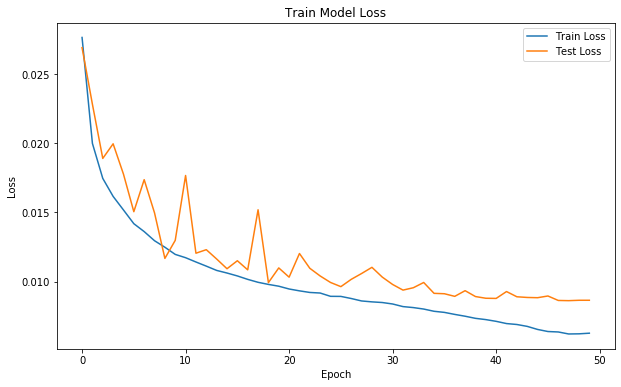

In [35]:
cifar_model_train.plot_loss_graph()

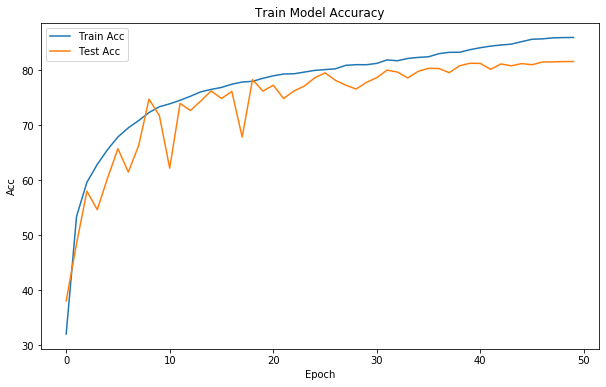

In [36]:
cifar_model_train.plot_acc_graph()

In [0]:
%matplotlib inline